In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
file_path = 'gdrive/My Drive/DL Project/'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as stl
stl.use('seaborn')

from sklearn.model_selection import train_test_split

In [4]:
import tensorflow as tf

In [0]:
traces=pd.read_csv(file_path+"traces.csv", index_col=0)

In [36]:
#Inspecting the Traces Dataset
traces.head()

,66.744,66.785,66.821,66.863,66.9,66.936,66.977,67.013,67.051,67.092,67.128,67.169,67.205,67.241,67.282,67.318,67.359,67.396,67.432,67.473,67.511,67.547,67.587,67.63,67.666,67.702,67.744,67.78,67.821,67.857,67.894,67.93,67.971,68.007,68.05,68.086,68.127,68.163,68.199,68.24,...,69.812,69.848,69.884,69.927,69.963,70.004,70.041,70.082,70.118,70.153,70.194,70.237,70.273,70.314,70.35,70.391,70.427,70.464,70.505,70.541,70.577,70.62,70.656,70.692,70.733,70.769,70.81,70.846,70.887,70.924,70.96,71.001,71.036,71.077,71.114,71.15,71.191,71.229,71.27,71.307
RD_190615_93_f_m3_p1_CCI_ipsi__X_2,0.057650,0.055303,0.052671,0.050129,0.048624,0.049296,0.051132,0.053324,0.055506,0.055948,0.052196,0.045880,0.040577,0.037270,0.035652,0.036398,0.038786,0.040234,0.039858,0.038281,0.035772,0.032956,0.033434,0.038294,0.045676,0.054345,0.063372,0.070971,0.075474,0.077289,0.075912,0.072246,0.068210,0.064451,0.062013,0.061621,0.062909,0.063931,0.064115,0.063593,...,0.023002,0.023077,0.023144,0.023204,0.023114,0.022379,0.020704,0.018830,0.017477,0.016607,0.015695,0.014862,0.014026,0.013084,0.012122,0.012109,0.013400,0.015130,0.016205,0.016645,0.017042,0.017459,0.017943,0.018720,0.019765,0.020369,0.020118,0.019366,0.018606,0.017967,0.017527,0.017317,0.017197,0.017030,0.016758,0.015877,0.014389,0.013301,0.013296,0.014221
RD_190615_93_f_m3_p1_CCI_ipsi__X_4,0.019241,0.019419,0.019428,0.019206,0.018750,0.018794,0.019635,0.021086,0.022668,0.023606,0.022939,0.021188,0.019597,0.018462,0.018090,0.019169,0.021191,0.022515,0.022572,0.022176,0.021893,0.021638,0.021866,0.022813,0.023754,0.023782,0.023193,0.022657,0.022389,0.022188,0.021896,0.021539,0.021303,0.021229,0.021148,0.020843,0.020429,0.020213,0.020309,0.020575,...,0.019724,0.019590,0.019433,0.019319,0.018996,0.018379,0.017856,0.017764,0.017890,0.018004,0.018145,0.018262,0.018241,0.018165,0.018165,0.018210,0.017936,0.017191,0.016490,0.016322,0.016663,0.017230,0.017962,0.018647,0.019148,0.019449,0.019537,0.019300,0.018533,0.017139,0.015432,0.014330,0.014232,0.014861,0.015822,0.016966,0.017682,0.017592,0.016976,0.016148
RD_190615_93_f_m3_p1_CCI_ipsi__X_5,0.013998,0.013356,0.011468,0.008754,0.006680,0.006182,0.007548,0.010621,0.014072,0.016442,0.017021,0.016084,0.014470,0.013921,0.014775,0.016985,0.020147,0.023530,0.026022,0.027749,0.028957,0.029293,0.029077,0.030475,0.034405,0.039388,0.043435,0.046372,0.047828,0.047770,0.047044,0.046590,0.046355,0.047134,0.049140,0.050700,0.050240,0.048596,0.046602,0.044310,...,0.032260,0.028983,0.024646,0.021709,0.021445,0.023281,0.025881,0.027902,0.028618,0.028194,0.027375,0.026109,0.024856,0.024156,0.023636,0.022968,0.022248,0.021483,0.020538,0.020052,0.021232,0.023597,0.025749,0.026798,0.026701,0.025222,0.023031,0.020838,0.019082,0.018005,0.018077,0.018708,0.019938,0.021779,0.022848,0.021161,0.017695,0.015500,0.015563,0.016773
RD_190615_93_f_m3_p1_CCI_ipsi__X_7,0.011891,0.011420,0.010904,0.011176,0.012313,0.014447,0.017166,0.019643,0.021115,0.021488,0.020513,0.018881,0.018995,0.022131,0.026433,0.030506,0.033739,0.034584,0.031590,0.028596,0.029177,0.032610,0.034848,0.034999,0.033058,0.028710,0.023110,0.019822,0.020415,0.022522,0.024221,0.025579,0.026696,0.027451,0.028219,0.029498,0.030780,0.030566,0.028024,0.024812,...,0.026085,0.026898,0.027166,0.026835,0.026599,0.026821,0.027692,0.029084,0.030335,0.030517,0.029502,0.027150,0.023414,0.020276,0.019382,0.020244,0.020948,0.021234,0.021137,0.020485,0.019484,0.019943,0.022469,0.025261,0.026412,0.026141,0.025102,0.023216,0.021348,0.020240,0.019887,0.020564,0.022746,0.024200,0.022886,0.019503,0.016823,0.015311,0.014944,0.015733
RD_190615_93_f_m3_p1_CCI_ipsi__X_9,0.012722,0.010612,0.007761,0.005356,0.004339,0.005455,0.008215,0.012059,0.015402,0.017688,0.019235,0.020399,0.021328,0.022395,0.023747,0.024877,0.025211,0.024892,0.024384,0.024266,0.025139,0.027172,0.030092,0.033331,0.036382,0.038685,0.039967,0.039908,0.038585,0.036917,0.036560,0.038070,0.040501,0.043259,0.045728,0.046813,0.046020,0.044626,0.043294,0.041846,...,0.025968,0.02

In [37]:
#Inspecting the Traces Dataset
traces.tail()

,66.744,66.785,66.821,66.863,66.9,66.936,66.977,67.013,67.051,67.092,67.128,67.169,67.205,67.241,67.282,67.318,67.359,67.396,67.432,67.473,67.511,67.547,67.587,67.63,67.666,67.702,67.744,67.78,67.821,67.857,67.894,67.93,67.971,68.007,68.05,68.086,68.127,68.163,68.199,68.24,...,69.812,69.848,69.884,69.927,69.963,70.004,70.041,70.082,70.118,70.153,70.194,70.237,70.273,70.314,70.35,70.391,70.427,70.464,70.505,70.541,70.577,70.62,70.656,70.692,70.733,70.769,70.81,70.846,70.887,70.924,70.96,71.001,71.036,71.077,71.114,71.15,71.191,71.229,71.27,71.307
RD_191024_M_42_m3_p1_Om1_Vc1__X_1559,0.134765,0.120683,0.111590,0.110765,0.115084,0.117964,0.116486,0.113007,0.110429,0.108645,0.110277,0.121547,0.144967,0.180341,0.238645,0.327674,0.430286,0.511683,0.557016,0.576565,0.584857,0.585717,0.581150,0.572990,0.560971,0.545223,0.532056,0.526522,0.525872,0.523400,0.516122,0.505975,0.495892,0.486654,0.477395,0.466722,0.453620,0.439258,0.426560,0.417205,...,0.333091,0.331649,0.329914,0.325254,0.315575,0.302730,0.290951,0.282315,0.275713,0.269769,0.264354,0.259193,0.253692,0.247426,0.241653,0.238804,0.240018,0.244166,0.249902,0.257150,0.264615,0.269300,0.269324,0.266124,0.261592,0.256525,0.251214,0.246253,0.241892,0.238103,0.235348,0.233909,0.232992,0.231027,0.227261,0.222325,0.216965,0.211210,0.205347,0.200440
RD_191024_M_42_m3_p1_Om1_Vc1__X_1560,0.159453,0.178948,0.230290,0.317523,0.438683,0.587362,0.727887,0.764743,0.645298,0.443103,0.327501,0.377269,0.509942,0.573704,0.517536,0.405885,0.329037,0.315205,0.339649,0.365305,0.377564,0.376792,0.374704,0.378383,0.379222,0.347216,0.265232,0.163922,0.101699,0.101117,0.134469,0.164292,0.181602,0.192368,0.202588,0.211215,0.219319,0.228994,0.242123,0.256620,...,0.328312,0.322647,0.319600,0.329044,0.342903,0.336474,0.296519,0.234301,0.175582,0.130022,0.096253,0.080821,0.094069,0.125494,0.147057,0.144366,0.127511,0.115444,0.114770,0.123340,0.139404,0.164395,0.195414,0.225420,0.251932,0.272038,0.274595,0.248787,0.205785,0.170558,0.157395,0.163387,0.184544,0.220383,0.260957,0.287569,0.291784,0.278556,0.249454,0.201419
RD_191024_M_42_m3_p1_Om1_Vc1__X_1562,0.087270,0.076862,0.068688,0.059885,0.043827,0.028575,0.044299,0.113287,0.222551,0.358821,0.526008,0.704220,0.827645,0.858465,0.830038,0.800390,0.787071,0.781071,0.772395,0.762511,0.751815,0.742256,0.735647,0.730627,0.722432,0.707771,0.688594,0.671271,0.659269,0.651208,0.643020,0.633398,0.623144,0.614603,0.608627,0.604294,0.599378,0.593212,0.586366,0.579655,...,0.469787,0.467650,0.463697,0.459049,0.456162,0.456149,0.457853,0.458324,0.456032,0.451994,0.448367,0.445751,0.443780,0.442248,0.441506,0.441457,0.442572,0.445589,0.449849,0.452614,0.452065,0.449073,0.445075,0.440557,0.435839,0.432092,0.429830,0.428707,0.428598,0.429934,0.432083,0.433129,0.432064,0.429803,0.428074,0.427557,0.427884,0.428248,0.428202,0.427558
RD_191024_M_42_m3_p1_Om1_Vc1__X_1563,0.010669,0.012976,0.016624,0.020214,0.023053,0.025285,0.025484,0.022249,0.019470,0.025237,0.043617,0.072441,0.107783,0.149368,0.197337,0.251242,0.309804,0.369734,0.423845,0.468895,0.504650,0.530006,0.542627,0.545241,0.538759,0.522213,0.499230,0.479432,0.467743,0.461536,0.457493,0.455853,0.455578,0.453986,0.449521,0.442923,0.435544,0.428162,0.420667,0.411686,...,0.157679,0.157773,0.156981,0.155461,0.152681,0.148340,0.143239,0.138392,0.133942,0.129852,0.126425,0.123690,0.121573,0.120559,0.121168,0.122500,0.122852,0.121635,0.119669,0.118021,0.116988,0.116224,0.114889,0.112694,0.109793,0.106368,0.102268,0.097999,0.094826,0.093533,0.093629,0.094154,0.094678,0.094802,0.093878,0.091802,0.089310,0.087377,0.086182,0.085200
RD_191024_M_42_m3_p1_Om1_Vc1__X_1564,0.211017,0.199367,0.208026,0.251720,0.342799,0.448019,0.491074,0.434374,0.323237,0.242481,0.226605,0.251439,0.271229,0.265917,0.245818,0.244702,0.279401,0.333061,0.362747,0.346778,0.302548,0.268082,0.259846,0.268687,0.273727,0.264033,0.242274,0.221658,0.209815,0.205952,0.207993,0.216388,0.227000,0.229159,0.217670,0.198795,0.181963,0.169947,0.162869,0.161415,...,0.1

In [38]:
traces.describe()

,66.744,66.785,66.821,66.863,66.9,66.936,66.977,67.013,67.051,67.092,67.128,67.169,67.205,67.241,67.282,67.318,67.359,67.396,67.432,67.473,67.511,67.547,67.587,67.63,67.666,67.702,67.744,67.78,67.821,67.857,67.894,67.93,67.971,68.007,68.05,68.086,68.127,68.163,68.199,68.24,...,69.812,69.848,69.884,69.927,69.963,70.004,70.041,70.082,70.118,70.153,70.194,70.237,70.273,70.314,70.35,70.391,70.427,70.464,70.505,70.541,70.577,70.62,70.656,70.692,70.733,70.769,70.81,70.846,70.887,70.924,70.96,71.001,71.036,71.077,71.114,71.15,71.191,71.229,71.27,71.307
count,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,...,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000,15225.000000
mean,0.061005,0.061672,0.064187,0.069261,0.076591,0.084492,0.091498,0.097602,0.103377,0.109169,0.115890,0.123677,0.131246,0.137680,0.143445,0.148830,0.153275,0.156534,0.158642,0.159790,0.160100,0.159484,0.157636,0.154337,0.150029,0.145727,0.142467,0.140586,0.139648,0.139009,0.138212,0.137259,0.136318,0.135618,0.135172,0.134702,0.133936,0.132895,0.131801,0.130742,...,0.108646,0.107810,0.106948,0.106101,0.105304,0.104581,0.103918,0.103407,0.103082,0.102809,0.102394,0.101828,0.101202,0.100627,0.100103,0.099564,0.098955,0.098327,0.097758,0.097324,0.096980,0.096643,0.096234,0.095834,0.095439,0.095012,0.094537,0.094087,0.093712,0.093482,0.093415,0.093299,0.093104,0.093313,0.094225,0.096019,0.098551,0.101861,0.105595,0.109204
std,0.085802,0.086935,0.090727,0.098576,0.110185,0.122893,0.133133,0.141034,0.149018,0.157400,0.167196,0.179350,0.191484,0.200487,0.206934,0.212153,0.215407,0.216714,0.216728,0.216015,0.214918,0.213451,0.211543,0.209296,0.206967,0.204475,0.201803,0.199394,0.197346,0.195463,0.193682,0.191915,0.190299,0.188874,0.187569,0.186330,0.184965,0.183494,0.182091,0.180705,...,0.143845,0.142954,0.142165,0.141433,0.140648,0.139657,0.138783,0.138126,0.137549,0.137165,0.136719,0.136021,0.135215,0.134449,0.133780,0.133147,0.132505,0.131766,0.131012,0.130421,0.129877,0.129453,0.129107,0.128671,0.128134,0.127540,0.126878,0.126237,0.125668,0.125289,0.125153,0.125262,0.125289,0.124875,0.124606,0.126131,0.131443,0.140647,0.150754,0.159459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013060,0.012820,0.012323,0.011545,0.011636,0.012322,0.013913,0.015809,0.017389,0.018421,0.018787,0.018908,0.019317,0.019828,0.020595,0.021533,0.022583,0.023468,0.024140,0.024596,0.024719,0.024723,0.024462,0.

In [0]:
labels=pd.read_csv(file_path+"labels.csv", index_col=0)

In [70]:
labels.head()

,AITC.100uM
RD_190615_93_f_m3_p1_CCI_ipsi__X_2,0
RD_190615_93_f_m3_p1_CCI_ipsi__X_4,0
RD_190615_93_f_m3_p1_CCI_ipsi__X_5,0
RD_190615_93_f_m3_p1_CCI_ipsi__X_7,0
RD_190615_93_f_m3_p1_CCI_ipsi__X_9,0


In [93]:
labels.tail()

,AITC.100uM
RD_191024_M_42_m3_p1_Om1_Vc1__X_1559,1
RD_191024_M_42_m3_p1_Om1_Vc1__X_1560,0
RD_191024_M_42_m3_p1_Om1_Vc1__X_1562,1
RD_191024_M_42_m3_p1_Om1_Vc1__X_1563,1
RD_191024_M_42_m3_p1_Om1_Vc1__X_1564,0


In [40]:
labels.describe()

,AITC.100uM
count,15225.000000
mean,0.203941
std,0.402939
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [52]:
labels['AITC.100uM'].value_counts()

0    12120
1     3105
Name: AITC.100uM, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.33)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10200, 120)
(5025, 120)
(10200, 1)
(5025, 1)


In [106]:
y_train['AITC.100uM'].value_counts()

0    8096
1    2104
Name: AITC.100uM, dtype: int64

In [107]:
y_test['AITC.100uM'].value_counts()

0    4024
1    1001
Name: AITC.100uM, dtype: int64

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [0]:
model_tv=Sequential([
               Dense(60,input_shape=(traces.shape[1],)),
               Dense(30,activation='relu'),
               Dropout(0.2),
               Dense(15,activation='relu'),
               Dense(5,activation='relu'),
               Dense(1,activation='relu'),

])

In [0]:
model_tv.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['BinaryAccuracy'])

In [97]:
model_tv.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                1830      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 9,641
Trainable params: 9,641
Non-trainable params: 0
____________________________________________________

In [98]:
history = model_tv.fit(X_train, y_train, epochs=25)
                

Train on 10200 samples
Epoch 1/25
10200/10200 [==============================] - 1s 82us/sample - loss: 0.3135 - binary_accuracy: 0.9046
Epoch 2/25
10200/10200 [==============================] - 1s 69us/sample - loss: 0.2593 - binary_accuracy: 0.9275
Epoch 3/25
10200/10200 [==============================] - 1s 71us/sample - loss: 0.2267 - binary_accuracy: 0.9352
Epoch 4/25
10200/10200 [==============================] - 1s 76us/sample - loss: 0.3403 - binary_accuracy: 0.9241
Epoch 5/25
10200/10200 [==============================] - 1s 69us/sample - loss: 1.1865 - binary_accuracy: 0.8777
Epoch 6/25
10200/10200 [==============================] - 1s 72us/sample - loss: 0.8800 - binary_accuracy: 0.9042
Epoch 7/25
10200/10200 [==============================] - 1s 70us/sample - loss: 3.1818 - binary_accuracy: 0.7937
Epoch 8/25
10200/10200 [==============================] - 1s 71us/sample - loss: 3.1818 - binary_accuracy: 0.7937
Epoch 9/25
10200/10200 [==============================] - 1s 72us

In [99]:
#Validation
history = model_tv.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=25)

Train on 10200 samples, validate on 5025 samples
Epoch 1/25
10200/10200 [==============================] - 1s 100us/sample - loss: 0.2784 - binary_accuracy: 0.9313 - val_loss: 0.2486 - val_binary_accuracy: 0.9437
Epoch 2/25
10200/10200 [==============================] - 1s 92us/sample - loss: 0.2792 - binary_accuracy: 0.9356 - val_loss: 0.2486 - val_binary_accuracy: 0.9495
Epoch 3/25
10200/10200 [==============================] - 1s 92us/sample - loss: 0.2436 - binary_accuracy: 0.9446 - val_loss: 0.2648 - val_binary_accuracy: 0.9497
Epoch 4/25
10200/10200 [==============================] - 1s 90us/sample - loss: 0.2727 - binary_accuracy: 0.9416 - val_loss: 0.2682 - val_binary_accuracy: 0.9399
Epoch 5/25
10200/10200 [==============================] - 1s 91us/sample - loss: 0.2484 - binary_accuracy: 0.9389 - val_loss: 0.3327 - val_binary_accuracy: 0.9210
Epoch 6/25
10200/10200 [==============================] - 1s 93us/sample - loss: 0.3326 - binary_accuracy: 0.9170 - val_loss: 0.1877 - 

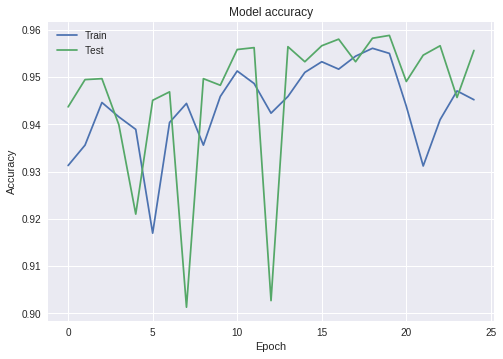

In [100]:
import matplotlib.pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

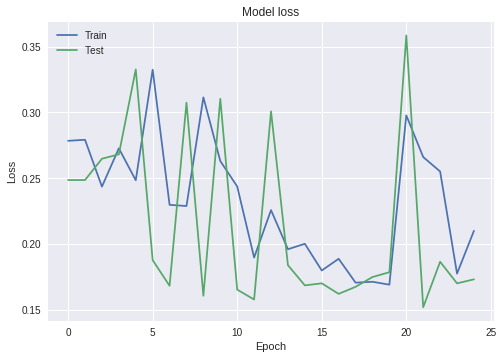

In [101]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.33)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential([
    Dense(50, activation='relu',input_shape=(traces.shape[1],)),
    # Dense(20, activation='relu'),
    # Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='relu')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['BinaryAccuracy'])

In [66]:
history = model.fit(X_train, y_train, epochs=25, 
                    validation_data=(X_test,y_test ))

NameError: ignored

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                6050      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 7,511
Trainable params: 7,511
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, epochs=25, 
                    validation_data=(X_test,y_test ))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10200 samples, validate on 5025 samples
Epoch 1/25
10200/10200 [==============================] - 1s 103us/sample - loss: 7.7291 - binary_accuracy: 0.4989 - val_loss: 7.7416 - val_binary_accuracy: 0.4981
Epoch 2/25
10200/10200 [==============================] - 1s 63us/sample - loss: 7.7291 - binary_accuracy: 0.4989 - val_loss: 7.7416 - val_binary_accuracy: 0.4981
Epoch 3/25
10200/10200 [==============================] - 1s 63us/sample - loss: 7.7291 - binary_accuracy: 0.4989 - val_loss: 7.7416 - val_binary_accuracy: 0.4981
Epoch 4/25
10200/10200 [==============================] - 1s 64us/sample - loss: 7.7291 - binary_accuracy: 0.4989 - val_loss: 7.7416 - val_binary_accuracy: 0.4981
Epoch 5/25
10200/10200 [==============================] - 1s 62us/sample - loss: 7.7291 - binary_accuracy: 0.4989 - val_loss: 7.7416 - val_binary_accuracy: 0.4981
Epoch 6/25
10200/10200 [=================